<a href="https://colab.research.google.com/github/YonBoySc/Project_houses_ml/blob/main/Project_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Предварительные вещи**

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 45.4 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 30.5 MB 1.5 MB/s 


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
%pip install geopy
%pip install nominatim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nominatim: filename=nominatim-0.1-py3-none-any.whl size=2365 sha256=3f9731419f50dec65f85e81bc936d488891a5767139e0d6d5df12a0b19217d96
  Stored in directory: /root/.cache/pip/wheels/37/00/9e/d904c390bfb174830ad3dcfd62af5544cee7d88bed4f8acedd
Successfully built nominatim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# **Инициализация датасета**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [ ]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


# **Определение самых часто встречающихся регионов**

Создали словарь регионов

In [ ]:
regions_count=df.groupby(['region'])['region'].count().to_dict()
print(regions_count)

{3: 439511, 69: 77, 81: 500368, 821: 2519, 1010: 48396, 1491: 3857, 1901: 12, 2072: 63128, 2328: 8160, 2359: 22216, 2484: 5431, 2528: 8441, 2594: 4837, 2604: 104780, 2661: 461820, 2722: 86728, 2806: 2151, 2814: 1125, 2843: 637224, 2860: 30558, 2871: 101086, 2880: 11081, 2885: 2464, 2900: 59082, 2922: 230545, 3019: 56468, 3106: 80350, 3153: 5573, 3230: 222652, 3446: 52827, 3870: 83453, 3991: 141633, 4007: 34336, 4086: 2212, 4189: 5590, 4240: 2405, 4249: 2760, 4374: 2795, 4417: 30423, 4695: 7496, 4963: 65, 4982: 33833, 5143: 3026, 5178: 745, 5241: 23271, 5282: 155645, 5368: 27827, 5520: 47796, 5703: 1210, 5736: 896, 5789: 9288, 5794: 3208, 5952: 48021, 5993: 5364, 6171: 237289, 6309: 1248, 6543: 3967, 6817: 74256, 6937: 4700, 7121: 2086, 7793: 7694, 7873: 2241, 7896: 39349, 7929: 2168, 8090: 21672, 8509: 2785, 8640: 1596, 8894: 2202, 9579: 9390, 9648: 20723, 9654: 1049435, 10160: 27822, 10201: 2554, 10582: 1787, 11171: 11654, 11416: 5243, 11991: 6382, 13098: 256, 13913: 735, 13919: 9913,

Определили 6 самых часто встречающихся регионов

In [ ]:
regions_sorted=sorted(regions_count.items(), key=lambda x: x[1], reverse=True)
nums_of_top6reg=[i[0] for i in regions_sorted[:6]]
nums_of_top6reg

[9654, 2843, 81, 2661, 3, 6171]

In [ ]:
df=df[df['region'].isin(nums_of_top6reg)]
df.reset_index(drop=True)
df=df.sample(frac=0.05, random_state=1)

In [ ]:
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
2504936,14990000,2019-09-03,18:10:25,55.731716,37.675110,3,3,6,9,2,44.00,6.0,1
993214,3000000,2019-01-24,15:24:37,45.040160,38.975965,2843,1,5,16,2,60.00,11.0,11
502381,6680400,2018-11-16,07:36:14,45.015886,38.953896,2843,2,3,4,2,87.00,15.0,1
1068640,2250000,2019-02-04,02:08:03,55.012868,82.999999,9654,1,1,10,2,63.85,11.0,11
4154884,13670140,2020-07-26,09:52:35,55.723670,37.824036,3,3,8,13,2,66.70,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213132,3400000,2020-02-01,03:34:16,55.051346,82.916439,9654,1,4,5,2,44.00,6.0,1
4791871,6000000,2020-12-01,06:33:51,55.024387,82.910774,9654,3,4,10,3,59.40,7.5,1
3938416,3990000,2020-06-22,16:26:05,60.004267,30.223324,2661,2,16,25,-1,24.50,5.0,1
4583282,2350000,2020-10-20,08:56:12,55.036700,82.994568,9654,1,5,5,1,28.00,6.0,1


# **Чистки регионов**

### **Чистка 9654 региона**

In [ ]:
first_reg=df[df['region']==9654]
first_reg.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.286000e+04,52860.000000,52860.000000,52860.0,52860.000000,52860.000000,52860.000000,52860.000000,52860.000000,52860.000000,52860.000000
mean,2.848874e+06,54.997933,82.963588,9654.0,1.425312,5.877847,11.071566,1.391090,52.666843,9.535496,5.929625
std,3.861908e+07,0.071516,0.185601,0.0,0.960820,4.307485,4.854496,1.296417,22.623454,5.128501,4.999552
min,-2.114150e+09,53.729945,75.953518,9654.0,0.000000,1.000000,1.000000,-1.000000,2.900000,0.010000,1.000000
25%,1.550000e+06,54.947141,82.948260,9654.0,1.000000,2.000000,10.000000,1.000000,39.020000,6.000000,1.000000
50%,2.150000e+06,55.013916,82.971383,9654.0,1.000000,5.000000,10.000000,1.000000,48.020000,8.810000,1.000000
75%,3.200000e+06,55.030393,83.003578,9654.0,2.000000,8.000000,10.000000,2.000000,60.772500,12.400000,11.000000
max,2.083290e+09,55.794813,84.693572,9654.0,5.000000,27.000000,29.000000,5.000000,720.000000,81.500000,11.000000


In [ ]:
print(max(first_reg['price']))

2083290000


In [ ]:
first_reg["one_qmetr"]=first_reg["price"]/first_reg["area"]
first_reg["coeff_level"]=first_reg["level"]/first_reg["levels"]
first_reg.drop(["date","time","geo_lat","geo_lon"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

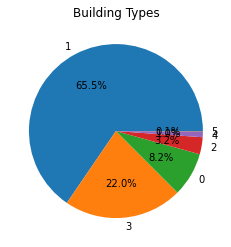

1    34602
3    11651
0     4338
2     1670
4      548
5       51
Name: building_type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

building_types = first_reg['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Building Types')
plt.show()
print(building_types)


In [ ]:
build_type=first_reg[first_reg['building_type']==4].index
first_reg.drop(build_type,inplace=True)
build_type=first_reg[first_reg['building_type']==5].index
first_reg.drop(build_type,inplace=True)
print(first_reg['building_type'].value_counts())

1    34602
3    11651
0     4338
2     1670
Name: building_type, dtype: int64


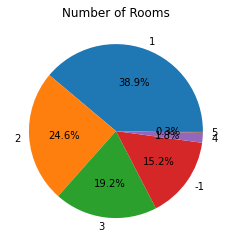

 1    20314
 2    12843
 3    10013
-1     7966
 4      959
 5      166
Name: rooms, dtype: int64


In [ ]:
rooms = first_reg['rooms'].value_counts()
plt.pie(rooms.values, labels=rooms.index, autopct='%1.1f%%')
plt.title('Number of Rooms')
plt.show()
print(first_reg['rooms'].value_counts())

In [ ]:
room=first_reg[first_reg['rooms']==4].index
first_reg.drop(room,inplace=True)
room=first_reg[first_reg['rooms']==5].index
first_reg.drop(room,inplace=True)
print(first_reg['rooms'].value_counts())

 1    20314
 2    12843
 3    10013
-1     7966
Name: rooms, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
price_high=first_reg[first_reg['price']<=0].index
first_reg.drop(price_high,inplace=True)
rooms=first_reg[first_reg['rooms']<=0].index
first_reg.drop(rooms,inplace=True)
oneqm=first_reg[first_reg['one_qmetr']<=0].index
first_reg.drop(oneqm,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
first_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,4.316100e+04,43161.0,43161.000000,43161.000000,43161.000000,43161.000000,43161.000000,43161.000000,43161.000000,4.316100e+04,43161.000000
mean,3.069698e+06,9654.0,1.411900,5.857580,10.994208,1.761127,53.161433,10.086920,5.804106,5.933908e+04,0.544396
std,2.314953e+07,0.0,0.938138,4.270509,4.898427,0.803364,18.408927,4.700498,4.996219,4.786812e+05,0.302032
min,1.880000e+03,9654.0,0.000000,1.000000,1.000000,1.000000,2.900000,0.010000,1.000000,6.266667e+01,0.038462
25%,1.650000e+06,9654.0,1.000000,2.000000,10.000000,1.000000,40.500000,7.000000,1.000000,3.075346e+04,0.280000
50%,2.241117e+06,9654.0,1.000000,5.000000,10.000000,2.000000,48.940000,10.000000,1.000000,4.518950e+04,0.555556
75%,3.300000e+06,9654.0,2.000000,8.000000,10.000000,2.000000,61.330000,12.920000,11.000000,6.770833e+04,0.800000
max,1.739059e+09,9654.0,3.000000,27.000000,29.000000,3.000000,671.000000,78.000000,11.000000,4.020250e+07,3.000000


In [ ]:
def price_type(price):
  for row in first_reg['price']:
    if price>=1.880000e+03 and price<1.650000e+06:
      return 0
    elif price>=1.650000e+06 and price<2.241117e+06:
      return 1
    elif price>=2.241117e+06 and price<=3.300000e+06:
      return 2
    else:
      return 3
first_reg['price_type']=first_reg['price'].apply(price_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


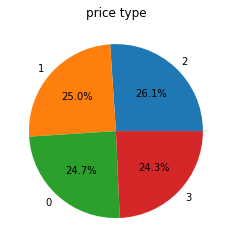

2    11246
1    10773
0    10657
3    10485
Name: price_type, dtype: int64


In [ ]:
pt = first_reg['price_type'].value_counts()
plt.pie(pt.values, labels=pt.index, autopct='%1.1f%%')
plt.title('price type')
plt.show()
print(first_reg['price_type'].value_counts())

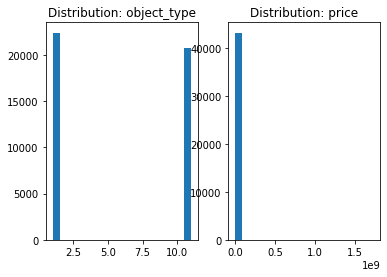

In [ ]:
pos = 0
for pos, feature in enumerate(['object_type', 'price']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(first_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

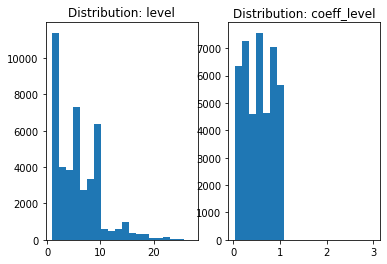

In [ ]:
pos = 0
for pos, feature in enumerate(['level', 'coeff_level']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(first_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
first_reg['level'].value_counts()

1     6699
2     4688
5     4000
3     3980
4     3844
8     3320
6     3318
10    3265
9     3128
7     2728
11     610
13     591
15     530
12     507
14     429
16     375
17     328
18     199
19     140
23      90
21      87
20      83
22      82
24      64
25      63
26      12
27       1
Name: level, dtype: int64

In [ ]:
for i in range(18,28):
  level=first_reg[first_reg['level']==i].index
  first_reg.drop(level,inplace=True)
first_reg['level'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


1     6699
2     4688
5     4000
3     3980
4     3844
8     3320
6     3318
10    3265
9     3128
7     2728
11     610
13     591
15     530
12     507
14     429
16     375
17     328
Name: level, dtype: int64

In [ ]:
def coeff_level_type(coeff_level):
  for row in first_reg['coeff_level']:
    if coeff_level>=0 and coeff_level<0.25:
      return 0
    elif coeff_level>=0.25 and coeff_level<0.5:
      return 1
    elif coeff_level>=0.5 and coeff_level<0.75:
      return 2
    elif coeff_level>=0.75 and coeff_level<=1:
      return 3
first_reg['coeff_level_type']=first_reg['coeff_level'].apply(coeff_level_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


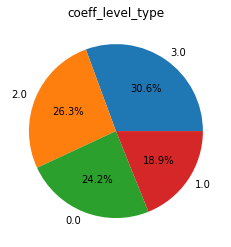

3.0    12962
2.0    11143
0.0    10234
1.0     7998
Name: coeff_level_type, dtype: int64


In [ ]:
cft = first_reg['coeff_level_type'].value_counts()
plt.pie(cft.values, labels=cft.index, autopct='%1.1f%%')
plt.title('coeff_level_type')
plt.show()
print(first_reg['coeff_level_type'].value_counts())

### **Чистка 2843 региона**

In [ ]:
sec_reg=df[df['region']==2843]
sec_reg.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,3.175800e+04,31758.000000,31758.000000,31758.0,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000
mean,3.558532e+06,44.875475,38.906934,2843.0,2.254487,6.288368,11.403678,1.628125,53.421799,11.697760,2.575351
std,3.661205e+06,0.506769,0.665278,0.0,1.125291,4.813769,6.521473,0.988968,44.976757,5.932241,3.643103
min,7.000000e+02,43.386338,36.697626,2843.0,0.000000,1.000000,1.000000,-1.000000,2.000000,0.100000,1.000000
25%,2.019700e+06,44.889178,38.945507,2843.0,2.000000,3.000000,5.000000,1.000000,38.000000,9.000000,1.000000
50%,2.800000e+06,45.042604,39.008127,2843.0,2.000000,5.000000,10.000000,2.000000,47.000000,11.000000,1.000000
75%,3.999999e+06,45.076058,39.047250,2843.0,3.000000,9.000000,16.000000,2.000000,63.000000,14.000000,1.000000
max,1.725000e+08,46.792747,41.524126,2843.0,5.000000,25.000000,30.000000,9.000000,5000.000000,160.000000,11.000000


In [ ]:
sec_reg["one_qmetr"]=sec_reg["price"]/sec_reg["area"]
sec_reg["coeff_level"]=sec_reg["level"]/sec_reg["levels"]
sec_reg.drop(["date","time","geo_lat","geo_lon"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
price_high=sec_reg[sec_reg['price']<=0].index
sec_reg.drop(price_high,inplace=True)
rooms=sec_reg[sec_reg['rooms']<=0].index
sec_reg.drop(rooms,inplace=True)
oneqm=sec_reg[sec_reg['one_qmetr']<=0].index
sec_reg.drop(oneqm,inplace=True)
sec_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,3.035800e+04,30358.0,30358.000000,30358.00000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,3.035800e+04,30358.000000
mean,3.607573e+06,2843.0,2.250642,6.30305,11.400751,1.749325,54.539345,11.926608,2.530074,6.607661e+04,0.583135
std,3.574493e+06,0.0,1.131762,4.82319,6.521567,0.830623,45.582580,5.884461,3.600006,4.378256e+04,0.287471
min,7.000000e+02,2843.0,0.000000,1.00000,1.000000,1.000000,2.000000,0.100000,1.000000,6.901408e+00,0.038462
25%,2.100000e+06,2843.0,2.000000,3.00000,5.000000,1.000000,39.000000,9.000000,1.000000,4.705882e+04,0.333333
50%,2.850000e+06,2843.0,2.000000,5.00000,10.000000,2.000000,48.000000,11.000000,1.000000,5.781250e+04,0.600000
75%,4.000000e+06,2843.0,3.000000,9.00000,16.000000,2.000000,64.000000,14.000000,1.000000,7.333333e+04,0.800000
max,1.725000e+08,2843.0,5.000000,25.00000,30.000000,9.000000,5000.000000,160.000000,11.000000,1.333333e+06,12.500000


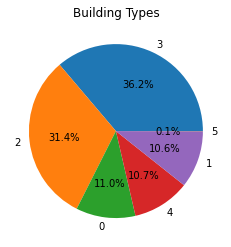

3    10991
2     9520
0     3354
4     3249
1     3226
5       18
Name: building_type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

building_types = sec_reg['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Building Types')
plt.show()
print(building_types)

In [ ]:
build_type=sec_reg[sec_reg['building_type']==5].index
sec_reg.drop(build_type,inplace=True)

print(sec_reg['building_type'].value_counts())

3    10991
2     9520
0     3354
4     3249
1     3226
Name: building_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


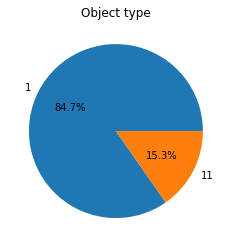

1     25696
11     4644
Name: object_type, dtype: int64


In [ ]:
typ = sec_reg['object_type'].value_counts()
plt.pie(typ.values, labels=typ.index, autopct='%1.1f%%')
plt.title('Object type')
plt.show()
print(sec_reg['object_type'].value_counts())

In [ ]:
sec_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,3.034000e+04,30340.0,30340.000000,30340.000000,30340.000000,30340.000000,30340.000000,30340.000000,30340.000000,3.034000e+04,30340.000000
mean,3.608293e+06,2843.0,2.249011,6.305603,11.405768,1.749176,54.545499,11.928575,2.530653,6.608148e+04,0.582966
std,3.575050e+06,0.0,1.130115,4.822764,6.519268,0.830609,45.592826,5.885048,3.600563,4.377286e+04,0.287404
min,7.000000e+02,2843.0,0.000000,1.000000,1.000000,1.000000,2.000000,0.100000,1.000000,6.901408e+00,0.038462
25%,2.100000e+06,2843.0,2.000000,3.000000,5.000000,1.000000,39.000000,9.000000,1.000000,4.705882e+04,0.333333
50%,2.850000e+06,2843.0,2.000000,5.000000,10.000000,2.000000,48.000000,11.000000,1.000000,5.782685e+04,0.600000
75%,4.000000e+06,2843.0,3.000000,9.000000,16.000000,2.000000,64.000000,14.000000,1.000000,7.333333e+04,0.800000
max,1.725000e+08,2843.0,4.000000,25.000000,30.000000,9.000000,5000.000000,160.000000,11.000000,1.333333e+06,12.500000


In [ ]:
def price_type(price):
  for row in first_reg['price']:
    if price>=7.000000e+02 and price<2.100000e+06	:
      return 0
    elif price>=2.100000e+06 and price<	2.850000e+06:
      return 1
    elif price>=2.850000e+06 and price<=4.000000e+06:
      return 2
    else:
      return 3
sec_reg['price_type']=sec_reg['price'].apply(price_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


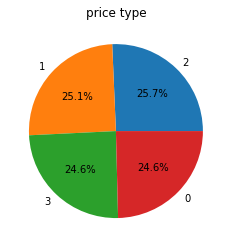

2    7791
1    7614
3    7470
0    7465
Name: price_type, dtype: int64


In [ ]:
pt = sec_reg['price_type'].value_counts()
plt.pie(pt.values, labels=pt.index, autopct='%1.1f%%')
plt.title('price type')
plt.show()
print(sec_reg['price_type'].value_counts())

In [ ]:
def coeff_level_type(coeff_level):
  for row in sec_reg['coeff_level']:
    if coeff_level>=0 and coeff_level<0.25:
      return 0
    elif coeff_level>=0.25 and coeff_level<0.5:
      return 1
    elif coeff_level>=0.5 and coeff_level<0.75:
      return 2
    elif coeff_level>=0.75 and coeff_level<=1:
      return 3
sec_reg['coeff_level_type']=sec_reg['coeff_level'].apply(coeff_level_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


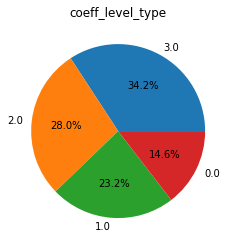

3.0    10374
2.0     8498
1.0     7046
0.0     4414
Name: coeff_level_type, dtype: int64


In [ ]:
cft = sec_reg['coeff_level_type'].value_counts()
plt.pie(cft.values, labels=cft.index, autopct='%1.1f%%')
plt.title('coeff_level_type')
plt.show()
print(sec_reg['coeff_level_type'].value_counts())

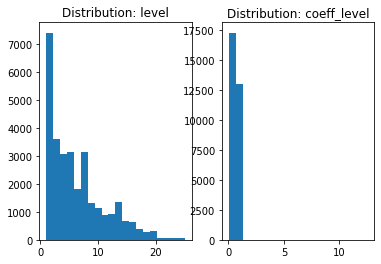

In [ ]:
pos = 0
for pos, feature in enumerate(['level', 'coeff_level']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(sec_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
sec_reg['level'].value_counts()

2     4040
3     3617
1     3357
5     3120
4     3061
6     1807
7     1737
8     1402
9     1307
10    1121
12     927
11     902
14     722
15     681
13     641
16     633
17     377
18     270
19     191
20     139
21      82
22      73
23      60
24      51
25      22
Name: level, dtype: int64

In [ ]:
for i in range(17,26):
  level=sec_reg[sec_reg['level']==i].index
  sec_reg.drop(level,inplace=True)
sec_reg['level'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2     4040
3     3617
1     3357
5     3120
4     3061
6     1807
7     1737
8     1402
9     1307
10    1121
12     927
11     902
14     722
15     681
13     641
16     633
Name: level, dtype: int64

### **Чистка 2661-го региона**

In [ ]:
first_reg=df[df['region']==2661]
first_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,4.618200e+05,461820.0,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,461820.000000,4.618200e+05,461820.000000
mean,8.209775e+06,2661.0,1.948281,7.582619,14.336625,1.778953,58.582237,12.749967,5.271231,1.328867e+05,0.544367
std,1.416036e+07,0.0,0.954559,5.694418,7.073714,1.124851,42.138205,7.641011,4.946610,2.405145e+05,0.282545
min,-1.719935e+09,2661.0,0.000000,1.000000,1.000000,-2.000000,1.400000,0.020000,1.000000,-6.246564e+07,0.032258
25%,4.400000e+06,2661.0,1.000000,3.000000,9.000000,1.000000,37.600000,8.500000,1.000000,1.017784e+05,0.300000
50%,5.950000e+06,2661.0,2.000000,6.000000,13.000000,2.000000,51.000000,11.100000,1.000000,1.218354e+05,0.538462
75%,8.800000e+06,2661.0,3.000000,11.000000,20.000000,2.000000,69.000000,15.150000,11.000000,1.480975e+05,0.791667
max,1.945383e+09,2661.0,5.000000,35.000000,38.000000,9.000000,7856.000000,1272.000000,11.000000,5.121710e+07,4.000000


In [ ]:
print(max(first_reg['price']))

1945382704


In [ ]:
price_high=first_reg[first_reg['price']<=0].index
first_reg.drop(price_high,inplace=True)
rooms=first_reg[first_reg['rooms']<=0].index
first_reg.drop(rooms,inplace=True)
oneqm=first_reg[first_reg['one_qmetr']<=0].index
first_reg.drop(oneqm,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


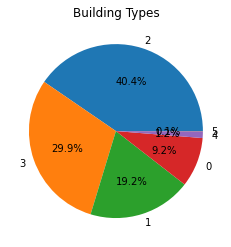

2    186720
3    137927
1     88604
0     42648
4      5675
5       246
Name: building_type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

building_types = first_reg['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Building Types')
plt.show()
print(building_types)


In [ ]:
build_type=first_reg[first_reg['building_type']==4].index
first_reg.drop(build_type,inplace=True)
build_type=first_reg[first_reg['building_type']==5].index
first_reg.drop(build_type,inplace=True)
print(first_reg['building_type'].value_counts())

2    174248
3    130678
1     86866
0     40766
Name: building_type, dtype: int64


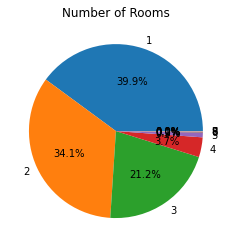

1    172635
2    147307
3     91735
4     15894
5      3765
6       683
7       303
8       140
9        96
Name: rooms, dtype: int64


In [ ]:
rooms = first_reg['rooms'].value_counts()
plt.pie(rooms.values, labels=rooms.index, autopct='%1.1f%%')
plt.title('Number of Rooms')
plt.show()
print(first_reg['rooms'].value_counts())

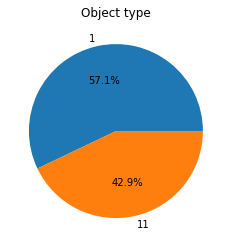

1     246226
11    185110
Name: object_type, dtype: int64


In [ ]:
typ = first_reg['object_type'].value_counts()
plt.pie(typ.values, labels=typ.index, autopct='%1.1f%%')
plt.title('Object type')
plt.show()
print(first_reg['object_type'].value_counts())

In [ ]:
room_type=first_reg[first_reg['rooms']==6].index
first_reg.drop(room_type,inplace=True)
room_type=first_reg[first_reg['rooms']==7].index
first_reg.drop(room_type,inplace=True)
room_type=first_reg[first_reg['rooms']==8].index
first_reg.drop(room_type,inplace=True)
room_type=first_reg[first_reg['rooms']==9].index
first_reg.drop(room_type,inplace=True)
print(first_reg['rooms'].value_counts())

1    172635
2    147307
3     91735
4     15894
5      3765
Name: rooms, dtype: int64


In [ ]:
first_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,4.313360e+05,431336.0,431336.000000,431336.000000,431336.000000,431336.000000,431336.000000,431336.000000,431336.000000,4.313360e+05,431336.000000
mean,8.437881e+06,2661.0,1.910170,7.572619,14.323523,1.912326,59.851675,13.164528,5.291550,1.333963e+05,0.544982
std,1.217569e+07,0.0,0.933743,5.671798,7.041211,0.911689,38.779777,7.560990,4.949561,1.553435e+05,0.282798
min,1.000000e+00,2661.0,0.000000,1.000000,1.000000,1.000000,2.400000,0.020000,1.000000,2.564103e-02,0.032258
25%,4.590000e+06,2661.0,1.000000,3.000000,9.000000,1.000000,38.900000,9.000000,1.000000,1.016284e+05,0.300000
50%,6.113931e+06,2661.0,2.000000,6.000000,13.000000,2.000000,52.420000,11.600000,1.000000,1.214754e+05,0.541667
75%,9.000000e+06,2661.0,3.000000,11.000000,20.000000,3.000000,70.000000,15.500000,11.000000,1.477901e+05,0.791667
max,1.945383e+09,2661.0,3.000000,35.000000,38.000000,5.000000,7856.000000,1272.000000,11.000000,5.121710e+07,4.000000


In [ ]:
def price_type(price):
  for row in first_reg['price']:
    if price>=1.000000e+00 and price<4.590000e+06:
      return 0
    elif price>=4.590000e+06 and price<6.113931e+06:
      return 1
    elif price>=6.113931e+06 and price<=9.000000e+06:
      return 2
    else:
      return 3
first_reg['price_type']=first_reg['price'].apply(price_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


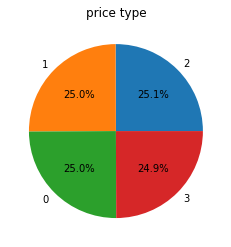

2    107895
1    107734
0    107463
3    107392
Name: price_type, dtype: int64


In [ ]:
pt = first_reg['price_type'].value_counts()
plt.pie(pt.values, labels=pt.index, autopct='%1.1f%%')
plt.title('price type')
plt.show()
print(first_reg['price_type'].value_counts())

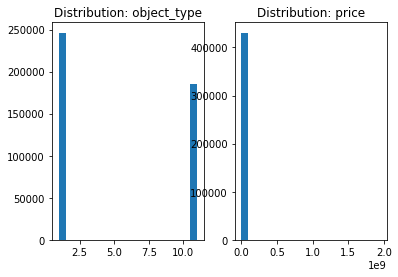

In [ ]:
pos = 0
for pos, feature in enumerate(['object_type', 'price']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(first_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
first_reg

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level,cat_price
0,6050000,2661,1,8,10,3,82.6,10.8,1,73244.552058,0.800000,0
7,3600000,2661,1,2,5,1,31.1,6.0,1,115755.627010,0.400000,0
36,3200000,2661,1,7,9,1,31.0,7.0,1,103225.806452,0.777778,0
47,6500000,2661,3,3,3,3,89.0,10.0,1,73033.707865,1.000000,0
54,6300000,2661,3,5,5,2,99.9,14.5,1,63063.063063,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5476909,8000000,2661,1,5,9,3,60.0,6.2,1,133333.333333,0.555556,0
5476937,12500000,2661,1,1,9,3,67.0,6.0,1,186567.164179,0.111111,0
5476949,30000000,2661,2,4,8,2,92.0,21.6,1,326086.956522,0.500000,0
5476964,9600000,2661,3,3,6,3,62.0,8.6,1,154838.709677,0.500000,0


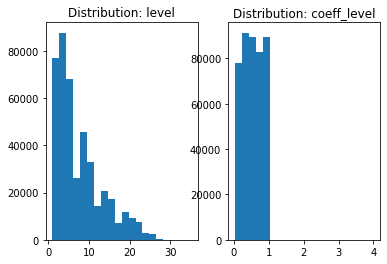

In [ ]:
pos = 0
for pos, feature in enumerate(['level', 'coeff_level']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(first_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
first_reg['level'].value_counts()

2     48123
3     45680
4     42080
5     39892
1     28862
6     28362
7     26310
8     23669
9     21986
10    17796
11    14970
12    14522
13    10850
14    10017
15     9164
16     8096
17     7101
18     6229
19     5449
20     4668
21     4459
22     3922
23     3522
24     2922
25     1833
26      473
27      209
28       51
30       32
29       29
31       22
33       16
34       14
35        3
32        3
Name: level, dtype: int64

In [ ]:
for i in range(26,36):
  level=first_reg[first_reg['level']==i].index
  first_reg.drop(level,inplace=True)
first_reg['level'].value_counts()

2     48123
3     45680
4     42080
5     39892
1     28862
6     28362
7     26310
8     23669
9     21986
10    17796
11    14970
12    14522
13    10850
14    10017
15     9164
16     8096
17     7101
18     6229
19     5449
20     4668
21     4459
22     3922
23     3522
24     2922
25     1833
Name: level, dtype: int64

In [ ]:
def coeff_level_type(coeff_level):
  for row in first_reg['coeff_level']:
    if coeff_level>=0 and coeff_level<0.25:
      return 0
    elif coeff_level>=0.25 and coeff_level<0.5:
      return 1
    elif coeff_level>=0.5 and coeff_level<0.75:
      return 2
    elif coeff_level>=0.75 and coeff_level<=1:
      return 3
first_reg['coeff_level_type']=first_reg['coeff_level'].apply(coeff_level_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


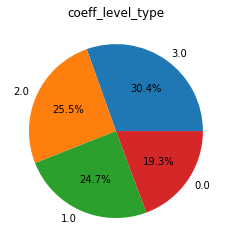

3.0    131057
2.0    109977
1.0    106252
0.0     83154
Name: coeff_level_type, dtype: int64


In [ ]:
cft = first_reg['coeff_level_type'].value_counts()
plt.pie(cft.values, labels=cft.index, autopct='%1.1f%%')
plt.title('coeff_level_type')
plt.show()
print(first_reg['coeff_level_type'].value_counts())

### **Чистка 81-го региона**

In [ ]:
th_reg=df[df['region']==81]
th_reg.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,2.493300e+04,24933.000000,24933.000000,24933.0,24933.000000,24933.000000,24933.000000,24933.000000,24933.000000,24933.000000,24933.000000
mean,4.770938e+06,55.725154,37.778864,81.0,1.929451,7.011270,12.753981,1.745959,51.606493,10.330285,3.417278
std,3.285123e+06,0.320439,0.553859,0.0,0.884854,5.641674,7.351959,0.944533,21.987681,4.625835,4.281388
min,1.000000e+01,54.328462,35.342420,81.0,0.000000,1.000000,1.000000,-1.000000,3.000000,0.200000,1.000000
25%,3.000000e+06,55.563151,37.446336,81.0,1.000000,3.000000,5.000000,1.000000,38.000000,7.000000,1.000000
50%,4.300000e+06,55.744679,37.825564,81.0,2.000000,5.000000,12.000000,2.000000,46.000000,9.600000,1.000000
75%,5.944401e+06,55.910578,38.021961,81.0,3.000000,10.000000,17.000000,2.000000,61.700000,12.000000,1.000000
max,2.977413e+08,56.853958,40.001763,81.0,5.000000,35.000000,39.000000,8.000000,995.500000,90.000000,11.000000


In [ ]:
rooms=th_reg[th_reg['rooms']<=0].index
th_reg.drop(rooms,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


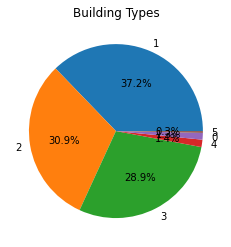

1    8986
2    7469
3    6982
4     330
0     302
5      80
Name: building_type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

building_types = th_reg['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Building Types')
plt.show()
print(building_types)

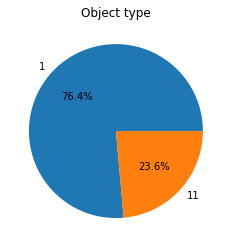

1     18455
11     5694
Name: object_type, dtype: int64


In [ ]:
typ = th_reg['object_type'].value_counts()
plt.pie(typ.values, labels=typ.index, autopct='%1.1f%%')
plt.title('Object type')
plt.show()
print(th_reg['object_type'].value_counts())

In [ ]:
build_type=th_reg[th_reg['building_type']==5].index
th_reg.drop(build_type,inplace=True)
build_type=th_reg[th_reg['building_type']==4].index
th_reg.drop(build_type,inplace=True)
build_type=th_reg[th_reg['building_type']==0].index
th_reg.drop(build_type,inplace=True)
print(th_reg['building_type'].value_counts())

1    8986
2    7469
3    6982
Name: building_type, dtype: int64


In [ ]:
th_reg.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,2.343700e+04,23437.000000,23437.000000,23437.0,23437.000000,23437.000000,23437.000000,23437.000000,23437.000000,23437.000000,23437.000000
mean,4.822192e+06,55.722188,37.782004,81.0,1.914494,7.003157,12.698852,1.835431,52.315656,10.468261,3.417118
std,3.336267e+06,0.323118,0.557486,0.0,0.820995,5.628170,7.332357,0.816608,21.686932,4.579813,4.281297
min,1.000000e+01,54.328462,35.342420,81.0,1.000000,1.000000,1.000000,1.000000,3.000000,0.200000,1.000000
25%,3.050000e+06,55.559033,37.449445,81.0,1.000000,3.000000,5.000000,1.000000,39.000000,7.000000,1.000000
50%,4.350000e+06,55.743367,37.833289,81.0,2.000000,5.000000,12.000000,2.000000,47.000000,9.900000,1.000000
75%,6.000000e+06,55.910578,38.022983,81.0,3.000000,10.000000,17.000000,2.000000,62.000000,12.000000,1.000000
max,2.977413e+08,56.853958,39.991391,81.0,3.000000,35.000000,39.000000,8.000000,995.500000,90.000000,11.000000


In [ ]:
def price_type(price):
  for row in th_reg['price']:
    if price>=1.000000e+01 and price<3.050000e+06:
      return 0
    elif price>=3.050000e+06 and price<4.350000e+06:
      return 1
    elif price>=4.350000e+06 and price<=6.000000e+06:
      return 2
    else:
      return 3
th_reg['price_type']=th_reg['price'].apply(price_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
th_reg["one_qmetr"]=th_reg["price"]/th_reg["area"]
th_reg["coeff_level"]=th_reg["level"]/th_reg["levels"]
th_reg.drop(["date","time","geo_lat","geo_lon"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

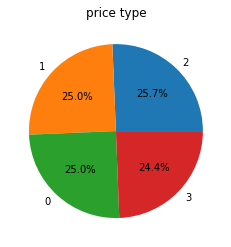

2    6012
1    5861
0    5848
3    5716
Name: price_type, dtype: int64


In [ ]:
pt = th_reg['price_type'].value_counts()
plt.pie(pt.values, labels=pt.index, autopct='%1.1f%%')
plt.title('price type')
plt.show()
print(th_reg['price_type'].value_counts())

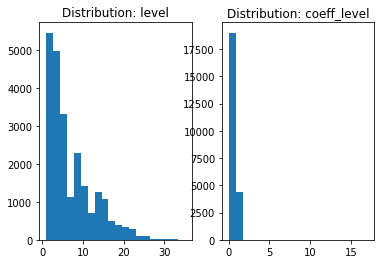

In [ ]:
pos = 0
for pos, feature in enumerate(['level', 'coeff_level']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(th_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
th_reg['level'].value_counts()

2     2876
3     2626
1     2584
4     2343
5     2176
9     1183
6     1144
7     1135
8     1112
10     755
12     713
11     665
13     650
14     602
15     564
16     507
17     495
19     207
18     194
22     173
20     172
21     156
23     122
24     113
25      95
30      14
29      13
26      11
27      10
28       9
32       8
33       7
31       2
35       1
Name: level, dtype: int64

In [ ]:
for i in range(23,36):
  level=th_reg[th_reg['level']==i].index
  th_reg.drop(level,inplace=True)
th_reg['level'].value_counts()

2     2876
3     2626
1     2584
4     2343
5     2176
9     1183
6     1144
7     1135
8     1112
10     755
12     713
11     665
13     650
14     602
15     564
16     507
17     495
19     207
18     194
22     173
20     172
21     156
Name: level, dtype: int64

### **Чистка 3-го регион**

In [ ]:
sec_reg=df[df['region']==3]
sec_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,4.395110e+05,439511.0,439511.000000,439511.000000,439511.000000,439511.000000,439511.000000,439511.000000,439511.000000,4.395110e+05,439511.000000
mean,1.313957e+07,3.0,1.846659,8.510465,16.305155,1.820940,58.111338,11.983181,5.292771,2.104451e+05,0.526070
std,1.945564e+07,0.0,0.792431,6.464976,7.535946,1.160408,36.085213,6.651784,4.949736,1.734430e+05,0.292729
min,-2.089967e+09,3.0,0.000000,1.000000,1.000000,-2.000000,1.400000,0.100000,1.000000,-5.320901e+07,0.027778
25%,6.962944e+06,3.0,1.000000,3.000000,10.000000,1.000000,38.900000,8.000000,1.000000,1.554000e+05,0.250000
50%,9.350000e+06,3.0,2.000000,7.000000,16.000000,2.000000,53.000000,10.500000,1.000000,1.897959e+05,0.520000
75%,1.350000e+07,3.0,2.000000,12.000000,22.000000,3.000000,70.000000,15.000000,11.000000,2.358491e+05,0.777778
max,1.096745e+09,3.0,5.000000,39.000000,39.000000,10.000000,5200.000000,1200.000000,11.000000,5.553086e+07,13.000000


In [ ]:
price_high=sec_reg[sec_reg['price']<=0].index
sec_reg.drop(price_high,inplace=True)
rooms=sec_reg[sec_reg['rooms']<=0].index
sec_reg.drop(rooms,inplace=True)
oneqm=sec_reg[sec_reg['one_qmetr']<=0].index
sec_reg.drop(oneqm,inplace=True)
sec_reg.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,4.108680e+05,410868.0,410868.000000,410868.000000,410868.000000,410868.000000,410868.000000,410868.000000,410868.000000,4.108680e+05,410868.000000
mean,1.369288e+07,3.0,1.849699,8.781331,16.451556,2.017716,60.569555,12.536218,5.393284,2.091497e+05,0.542416
std,1.934243e+07,0.0,0.787958,6.400776,7.504118,0.919781,35.549521,6.449938,4.963059,1.123710e+05,0.287059
min,1.000000e+00,3.0,0.000000,1.000000,1.000000,1.000000,1.900000,0.100000,1.000000,1.851852e-02,0.027778
25%,7.315360e+06,3.0,1.000000,4.000000,10.000000,1.000000,40.100000,8.500000,1.000000,1.538462e+05,0.294118
50%,9.700000e+06,3.0,2.000000,7.000000,16.000000,2.000000,54.700000,11.000000,1.000000,1.880102e+05,0.545455
75%,1.393080e+07,3.0,2.000000,12.000000,22.000000,3.000000,72.000000,15.800000,11.000000,2.337812e+05,0.791667
max,1.096745e+09,3.0,5.000000,39.000000,39.000000,10.000000,5200.000000,1200.000000,11.000000,1.026664e+07,13.000000


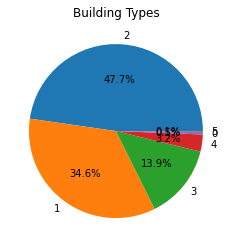

2    196055
1    142270
3     56914
4     13045
0      2048
5       536
Name: building_type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

building_types = sec_reg['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Building Types')
plt.show()
print(building_types)



In [ ]:
build_type=first_reg[first_reg['building_type']==4].index
first_reg.drop(build_type,inplace=True)
build_type=first_reg[first_reg['building_type']==5].index
first_reg.drop(build_type,inplace=True)
build_type=first_reg[first_reg['building_type']==0].index
first_reg.drop(build_type,inplace=True)
print(first_reg['building_type'].value_counts())

2    186720
3    137927
1     88604
Name: building_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


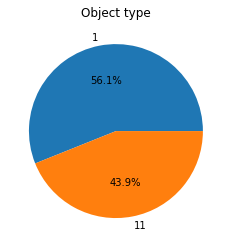

1     230362
11    180506
Name: object_type, dtype: int64


In [ ]:
typ = sec_reg['object_type'].value_counts()
plt.pie(typ.values, labels=typ.index, autopct='%1.1f%%')
plt.title('Object type')
plt.show()
print(sec_reg['object_type'].value_counts())

In [ ]:
sec_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,4.108680e+05,410868.0,410868.000000,410868.000000,410868.000000,410868.000000,410868.000000,410868.000000,410868.000000,4.108680e+05,410868.000000
mean,1.369288e+07,3.0,1.849699,8.781331,16.451556,2.017716,60.569555,12.536218,5.393284,2.091497e+05,0.542416
std,1.934243e+07,0.0,0.787958,6.400776,7.504118,0.919781,35.549521,6.449938,4.963059,1.123710e+05,0.287059
min,1.000000e+00,3.0,0.000000,1.000000,1.000000,1.000000,1.900000,0.100000,1.000000,1.851852e-02,0.027778
25%,7.315360e+06,3.0,1.000000,4.000000,10.000000,1.000000,40.100000,8.500000,1.000000,1.538462e+05,0.294118
50%,9.700000e+06,3.0,2.000000,7.000000,16.000000,2.000000,54.700000,11.000000,1.000000,1.880102e+05,0.545455
75%,1.393080e+07,3.0,2.000000,12.000000,22.000000,3.000000,72.000000,15.800000,11.000000,2.337812e+05,0.791667
max,1.096745e+09,3.0,5.000000,39.000000,39.000000,10.000000,5200.000000,1200.000000,11.000000,1.026664e+07,13.000000


In [ ]:
def price_type(price):
  for row in first_reg['price']:
    if price>=1.000000e+00 and price<7.315360e+06:
      return 0
    elif price>=7.315360e+06 and price<9.700000e+06:
      return 1
    elif price>=9.700000e+06 and price<=1.393080e+07:
      return 2
    else:
      return 3
sec_reg['price_type']=sec_reg['price'].apply(price_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


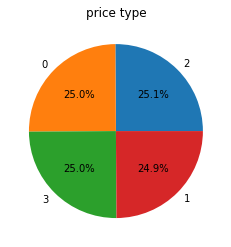

2    103164
0    102717
3    102699
1    102288
Name: price_type, dtype: int64


In [ ]:
pt = sec_reg['price_type'].value_counts()
plt.pie(pt.values, labels=pt.index, autopct='%1.1f%%')
plt.title('price type')
plt.show()
print(sec_reg['price_type'].value_counts())

In [ ]:
def coeff_level_type(coeff_level):
  for row in sec_reg['coeff_level']:
    if coeff_level>=0 and coeff_level<0.25:
      return 0
    elif coeff_level>=0.25 and coeff_level<0.5:
      return 1
    elif coeff_level>=0.5 and coeff_level<0.75:
      return 2
    elif coeff_level>=0.75 and coeff_level<=1:
      return 3
sec_reg['coeff_level_type']=sec_reg['coeff_level'].apply(coeff_level_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


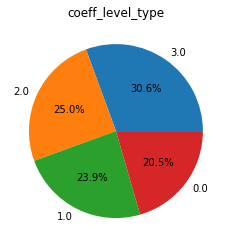

3.0    125681
2.0    102575
1.0     98318
0.0     84270
Name: coeff_level_type, dtype: int64


In [ ]:
cft = sec_reg['coeff_level_type'].value_counts()
plt.pie(cft.values, labels=cft.index, autopct='%1.1f%%')
plt.title('coeff_level_type')
plt.show()
print(sec_reg['coeff_level_type'].value_counts())

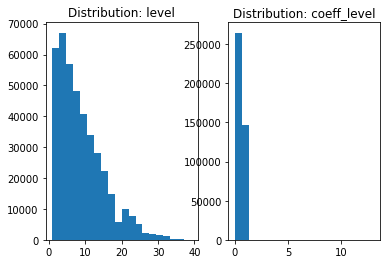

In [ ]:
pos = 0
for pos, feature in enumerate(['level', 'coeff_level']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(sec_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
sec_reg['level'].value_counts()

2     40536
3     34476
4     32585
5     31546
6     25260
7     24196
8     24148
9     23323
1     21550
10    17507
11    17143
12    16923
13    14426
14    13744
15    11456
16    10926
17     8832
18     6086
19     5689
20     5294
21     4768
22     4393
23     3267
24     2892
25     2220
26     1263
27     1077
28      998
29      920
30      901
31      760
32      685
33      549
34      164
36      117
35      107
37       75
38       40
39       26
Name: level, dtype: int64

In [ ]:
for i in range(18,40):
  level=sec_reg[sec_reg['level']==i].index
  sec_reg.drop(level,inplace=True)
sec_reg['level'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2     40536
3     34476
4     32585
5     31546
6     25260
7     24196
8     24148
9     23323
1     21550
10    17507
11    17143
12    16923
13    14426
14    13744
15    11456
16    10926
17     8832
Name: level, dtype: int64

### **Чистка 6171-го региона**

In [ ]:
th_reg=df[df['region']==6171]
th_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,2.372890e+05,237289.0,237289.000000,237289.000000,237289.000000,237289.000000,237289.000000,237289.000000,237289.000000,2.372890e+05,237289.000000
mean,3.400825e+06,6171.0,1.976033,6.146762,11.350033,1.901331,52.855993,10.511629,3.090826,6.415009e+04,0.577134
std,2.428744e+06,0.0,1.155318,5.472039,7.910486,0.965939,25.254738,6.071720,4.066544,4.124978e+04,0.291610
min,1.000000e+00,6171.0,0.000000,1.000000,1.000000,-2.000000,0.320000,0.010000,1.000000,2.702703e-02,0.030303
25%,2.100000e+06,6171.0,1.000000,2.000000,5.000000,1.000000,38.000000,6.200000,1.000000,5.000000e+04,0.333333
50%,2.950000e+06,6171.0,2.000000,4.000000,9.000000,2.000000,47.370000,9.000000,1.000000,6.481928e+04,0.600000
75%,4.000000e+06,6171.0,3.000000,8.000000,16.000000,3.000000,62.000000,12.300000,1.000000,7.700422e+04,0.800000
max,2.000000e+08,6171.0,5.000000,37.000000,38.000000,9.000000,1800.000000,250.000000,11.000000,9.359375e+06,12.000000


In [ ]:
rooms=th_reg[th_reg['rooms']<=0].index
th_reg.drop(rooms,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


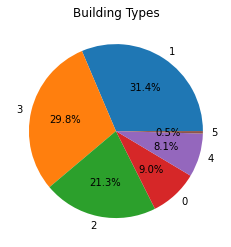

1    72838
3    69081
2    49318
0    20928
4    18830
5     1068
Name: building_type, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

building_types = th_reg['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Building Types')
plt.show()
print(building_types)


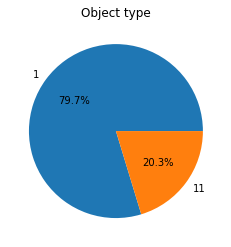

1     184109
11     46886
Name: object_type, dtype: int64


In [ ]:
typ = th_reg['object_type'].value_counts()
plt.pie(typ.values, labels=typ.index, autopct='%1.1f%%')
plt.title('Object type')
plt.show()
print(th_reg['object_type'].value_counts())

In [ ]:
build_type=th_reg[th_reg['building_type']==5].index
th_reg.drop(build_type,inplace=True)
print(th_reg['building_type'].value_counts())

1    72838
3    69081
2    49318
0    20928
4    18830
Name: building_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
th_reg.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type,one_qmetr,coeff_level
count,2.309950e+05,230995.0,230995.000000,230995.000000,230995.000000,230995.000000,230995.000000,230995.00000,230995.000000,2.309950e+05,230995.000000
mean,3.438943e+06,6171.0,1.965571,6.113236,11.281114,1.966047,53.415961,10.61528,3.029741,6.404373e+04,0.576814
std,2.441532e+06,0.0,1.140906,5.423385,7.841909,0.872126,25.123064,6.07657,4.022143,4.129323e+04,0.291426
min,1.000000e+00,6171.0,0.000000,1.000000,1.000000,1.000000,0.320000,0.01000,1.000000,2.702703e-02,0.030303
25%,2.150000e+06,6171.0,1.000000,2.000000,5.000000,1.000000,38.900000,6.50000,1.000000,5.000000e+04,0.333333
50%,2.999000e+06,6171.0,2.000000,4.000000,9.000000,2.000000,48.000000,9.00000,1.000000,6.470588e+04,0.600000
75%,4.080000e+06,6171.0,3.000000,8.000000,16.000000,3.000000,62.000000,12.50000,1.000000,7.679487e+04,0.800000
max,2.000000e+08,6171.0,4.000000,37.000000,38.000000,9.000000,1800.000000,250.00000,11.000000,9.359375e+06,12.000000


In [ ]:
def price_type(price):
  for row in th_reg['price']:
    if price>=1.000000e+00 and price<2.150000e+06:
      return 0
    elif price>=2.150000e+06 and price<2.999000e+06:
      return 1
    elif price>=2.999000e+06 and price<=4.080000e+06:
      return 2
    else:
      return 3
th_reg['price_type']=th_reg['price'].apply(price_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


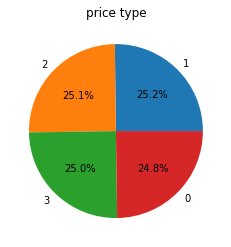

1    58201
2    57880
3    57686
0    57228
Name: price_type, dtype: int64


In [ ]:
pt = th_reg['price_type'].value_counts()
plt.pie(pt.values, labels=pt.index, autopct='%1.1f%%')
plt.title('price type')
plt.show()
print(th_reg['price_type'].value_counts())

In [ ]:
def coeff_level_type(coeff_level):
  for row in th_reg['coeff_level']:
    if coeff_level>=0 and coeff_level<0.25:
      return 0
    elif coeff_level>=0.25 and coeff_level<0.5:
      return 1
    elif coeff_level>=0.5 and coeff_level<0.75:
      return 2
    elif coeff_level>=0.75 and coeff_level<=1:
      return 3
th_reg['coeff_level_type']=th_reg['coeff_level'].apply(coeff_level_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


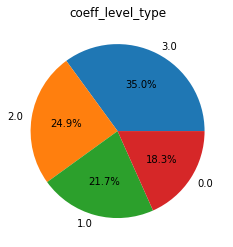

3.0    80918
2.0    57588
1.0    50137
0.0    42298
Name: coeff_level_type, dtype: int64


In [ ]:
cft = th_reg['coeff_level_type'].value_counts()
plt.pie(cft.values, labels=cft.index, autopct='%1.1f%%')
plt.title('coeff_level_type')
plt.show()
print(th_reg['coeff_level_type'].value_counts())

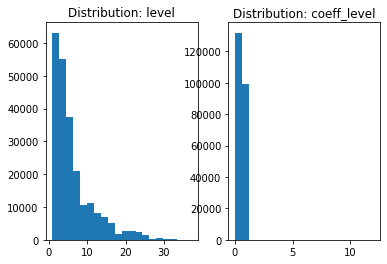

In [ ]:
pos = 0
for pos, feature in enumerate(['level', 'coeff_level']):
    sp = plt.subplot(1, 2, pos + 1)
    plt.hist(th_reg[feature], bins=20)
    plt.title(f'Distribution: {feature}')
plt.show()

In [ ]:
th_reg['level'].value_counts()

2     33628
1     29528
3     29193
5     26649
4     26081
6     10847
9     10592
8     10431
7     10411
10     6633
11     4669
12     4520
13     3629
14     3578
15     3368
16     3048
17     2086
18     1720
19     1449
21     1324
20     1308
22     1225
24     1175
23     1173
25      965
26      446
27      286
28      232
29      222
32      152
31      135
30      129
34       59
33       45
37       27
36       22
35       10
Name: level, dtype: int64

In [ ]:
for i in range(11,38):
  level=th_reg[th_reg['level']==i].index
  th_reg.drop(level,inplace=True)
th_reg['level'].value_counts()

2     33628
1     29528
3     29193
5     26649
4     26081
6     10847
9     10592
8     10431
7     10411
10     6633
Name: level, dtype: int64

# **Дешифровка кодов самых часто встречающихся регионов**#

(array([2.648e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.10000e+05, 9.61090e+07, 1.91808e+08, 2.87507e+08, 3.83206e+08,
        4.78905e+08, 5.74604e+08, 6.70303e+08, 7.66002e+08, 8.61701e+08,
        9.57400e+08]),
 <a list of 10 Patch objects>)

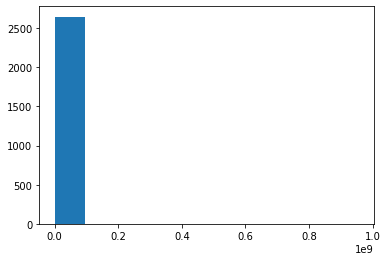

In [ ]:
cols = ['price',
        'region', 
        'geo_lat', 
        'geo_lon', 
        'building_type', 
        'level', 
        'levels', 
        'rooms', 
        'kitchen_area',
        'object_type'
       ]
#fig, ax = plt.subplots(6)
#for k in nums_of_top6reg:
x=df[df['region']==9654]
plt.hist(x['price'])

In [ ]:
df_regs=df.groupby("region",as_index=False).first()
df_regs


,region,price,date,time,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type
0,3,14990000,2019-09-03,18:10:25,55.731716,37.675110,3,6,9,2,44.00,6.0,1
1,81,4200000,2019-09-05,11:39:56,56.010364,37.847140,1,4,5,3,60.00,6.0,1
2,2661,4680000,2020-12-06,09:10:13,59.839750,30.111825,2,6,12,1,31.70,8.0,1
3,2843,3000000,2019-01-24,15:24:37,45.040160,38.975965,1,5,16,2,60.00,11.0,11
4,6171,4350000,2018-12-05,06:30:52,56.792054,60.614423,1,6,12,3,63.00,9.0,1
5,9654,2250000,2019-02-04,02:08:03,55.012868,82.999999,1,1,10,2,63.85,11.0,11


In [ ]:
df_regs['lat_lon'] = df_regs[['geo_lat', 'geo_lon']].apply(
    lambda x: ', '.join(x.astype(str)),
    axis=1
)
df_regs

,region,price,date,time,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,lat_lon
0,3,14990000,2019-09-03,18:10:25,55.731716,37.675110,3,6,9,2,44.00,6.0,1,"55.731716, 37.67511"
1,81,4200000,2019-09-05,11:39:56,56.010364,37.847140,1,4,5,3,60.00,6.0,1,"56.0103638, 37.8471403"
2,2661,4680000,2020-12-06,09:10:13,59.839750,30.111825,2,6,12,1,31.70,8.0,1,"59.83975, 30.111825"
3,2843,3000000,2019-01-24,15:24:37,45.040160,38.975965,1,5,16,2,60.00,11.0,11,"45.0401604, 38.9759647"
4,6171,4350000,2018-12-05,06:30:52,56.792054,60.614423,1,6,12,3,63.00,9.0,1,"56.7920545, 60.6144233"
5,9654,2250000,2019-02-04,02:08:03,55.012868,82.999999,1,1,10,2,63.85,11.0,11,"55.0128684, 82.9999987"


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='https://www.openstreetmap.org/')
# overpass_url = 'https://overpass.openstreetmap.ru'

In [ ]:
df_regs['point_inf'] = df_regs['lat_lon'].apply(
    lambda x: geolocator.reverse(x).raw
)     
df_regs

,region,price,date,time,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,lat_lon,point_inf
0,3,14990000,2019-09-03,18:10:25,55.731716,37.675110,3,6,9,2,44.00,6.0,1,"55.731716, 37.67511","{'place_id': 117833154, 'licence': 'Data © Ope..."
1,81,4200000,2019-09-05,11:39:56,56.010364,37.847140,1,4,5,3,60.00,6.0,1,"56.0103638, 37.8471403","{'place_id': 117933844, 'licence': 'Data © Ope..."
2,2661,4680000,2020-12-06,09:10:13,59.839750,30.111825,2,6,12,1,31.70,8.0,1,"59.83975, 30.111825","{'place_id': 205073354, 'licence': 'Data © Ope..."
3,2843,3000000,2019-01-24,15:24:37,45.040160,38.975965,1,5,16,2,60.00,11.0,11,"45.0401604, 38.9759647","{'place_id': 150739363, 'licence': 'Data © Ope..."
4,6171,4350000,2018-12-05,06:30:52,56.792054,60.614423,1,6,12,3,63.00,9.0,1,"56.7920545, 60.6144233","{'place_id': 118071998, 'licence': 'Data © Ope..."
5,9654,2250000,2019-02-04,02:08:03,55.012868,82.999999,1,1,10,2,63.85,11.0,11,"55.0128684, 82.9999987","{'place_id': 230825406, 'licence': 'Data © Ope..."


In [ ]:
df_regs['point_inf'][3]

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
  'city': 'Краснодар',
  'city_district': 'Западный округ',
  'country': 'Россия',
  'country_code': 'ru',
  'county': 'городской округ Краснодар',
  'postcode': '350000',
  'region': 'Южный федеральный округ',
  'road': 'Северная улица',
  'state': 'Краснодарский край'},
 'boundingbox': ['45.0400873', '45.0401969', '38.9756831', '38.976293'],
 'display_name': 'Северная улица, Западный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия',
 'lat': '45.040146685622474',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '38.9759622328633',
 'osm_id': 189820172,
 'osm_type': 'way',
 'place_id': 150739363}

Вытаскиваем из словаря название региона

In [ ]:
df_regs['regs_decrypt'] = df_regs['point_inf'].apply(
    lambda x: x['address'].get('state')
)
df_regs=df_regs[['region','regs_decrypt']]

In [ ]:
df=df.merge(df_regs, on='region')
df


,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,regs_decrypt
0,14990000,2019-09-03,18:10:25,55.731716,37.675110,3,3,6,9,2,44.00,6.00,1,Москва
1,13670140,2020-07-26,09:52:35,55.723670,37.824036,3,3,8,13,2,66.70,11.90,1,Москва
2,6802120,2020-06-30,11:48:06,55.680224,37.738207,3,1,4,25,1,41.20,21.20,11,Москва
3,4000000,2020-11-10,14:09:56,55.800094,37.535700,3,3,1,8,-1,15.00,2.00,1,Москва
4,6674689,2020-01-21,11:39:45,55.702798,37.872946,3,2,17,17,3,77.00,15.50,11,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166277,2650000,2018-11-08,14:19:45,56.838522,60.605491,6171,1,4,12,1,35.00,18.00,1,Свердловская область
166278,2990000,2019-10-30,15:55:09,56.894333,60.604460,6171,4,3,5,2,43.00,7.00,1,Свердловская область
166279,2070000,2019-03-01,07:01:01,56.752823,60.695983,6171,3,5,9,1,36.30,7.00,1,Свердловская область
166280,3150000,2019-02-12,10:30:28,56.843910,60.699712,6171,2,4,24,1,43.04,13.44,11,Свердловская область


In [ ]:
df["one_qmetr"]=df["price"]/df["area"]
df["coeff_level"]=df["level"]/df["levels"]

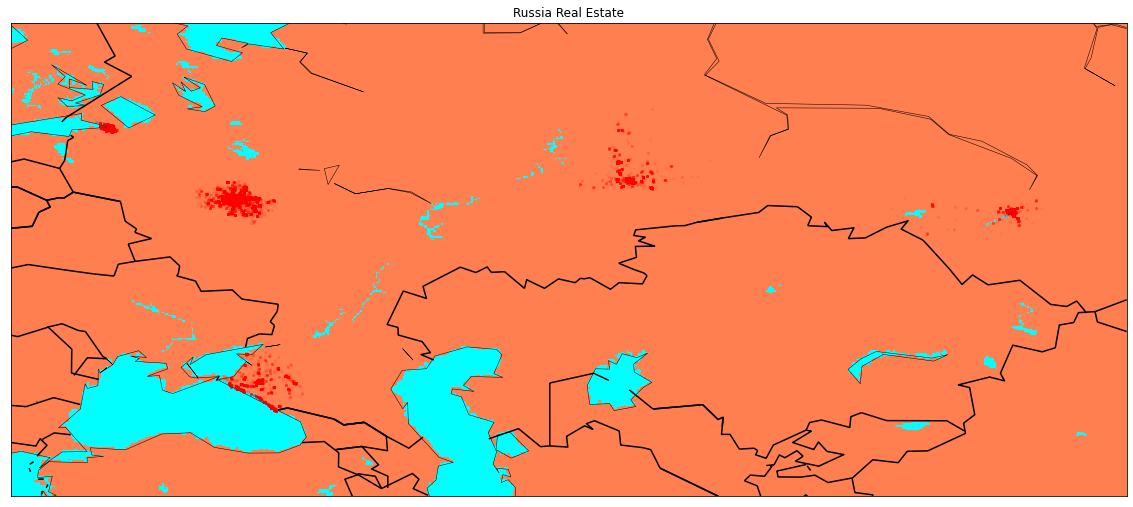

In [ ]:
lat = df['geo_lat'].values
lon = df['geo_lon'].values

plt.figure(figsize=(20,15))

m = Basemap(projection="mill"
            ,llcrnrlat=lat.min()-5
            ,urcrnrlat=lat.max()+5
            ,llcrnrlon=lon.min()-5
            ,urcrnrlon=lon.max()+5
            ,resolution='c'
            ,epsg=4269)
m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=1.5) 


parallels = np.arange(0.,81,10.)
meridians = np.arange(0.,360.,10.)

m.plot(lon, lat, 'ro', markersize=2 ,alpha=.05)

plt.title("Russia Real Estate")
plt.show()


In [ ]:
df.drop(["date","time","geo_lat","geo_lon"],axis=1,inplace=True)
price_high=df[df['price']>=3.5000000e+08].index
df.drop(price_high,inplace=True)
rooms=df[df['rooms']<= 0].index
df.drop(rooms,inplace=True)
price=df[df['price'] <= 5000].index
df.drop(price,inplace=True)
df.drop(df[df['object_type']==1].index,inplace=True)

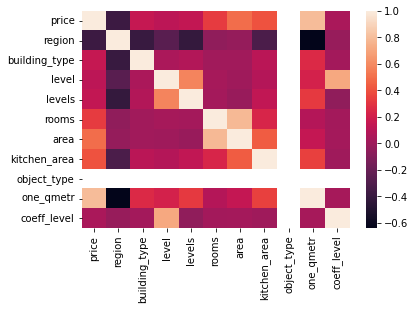

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['price','regs_decrypt'], axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)

# **Соседи**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score                         

neighbors = []                                                              
cv_scores = []                                                              

for k in range(1, 51, 2):                                               
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k)                             
    scores = cross_val_score( 
        knn, x_train, y_train, cv = 10, scoring = 'accuracy') 
    print(scores)
    cv_scores.append(scores.mean())   
    
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores)   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.35431179 0.35791497 0.35166947 0.35527264 0.34950757 0.34262374
 0.34430562 0.34190293 0.34935127 0.35055262]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.31707903 0.32548643 0.32140283 0.32212347 0.3185203  0.30514176
 0.30658337 0.31090822 0.31283037 0.31499279]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.30218592 0.30699015 0.30771079 0.30626952 0.307951   0.28976454
 0.2924075  0.29505046 0.29721288 0.30057665]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.28705261 0.29161662 0.29185683 0.29305789 0.29233726 0.27727054
 0.2791927  0.28183566 0.28327727 0.28592023]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.27239971 0.27864521 0.28176796 0.2805669  0.28104732 0.2659779
 0.26814032 0.2698222  0.2729457  0.27438731]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.26327168 0.26879654 0.26879654 0.27023781 0.26879654 0.25732821
 0.25804901 0.25925036 0.26237386 0.2635752 ]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.25582513 0.25870766 0.2615902  0.26062935 0.2615902  0.24987987
 0.24795771 0.2503604  0.25564632 0.25684767]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.24669709 0.25054048 0.25390344 0.25486428 0.25678597 0.2433926
 0.24291206 0.24291206 0.24843825 0.24939933]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.24021139 0.2426135  0.24501561 0.24813836 0.24789815 0.23546372
 0.23522345 0.2371456  0.24243152 0.24363287]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.23300504 0.23684843 0.23925054 0.24525583 0.24117223 0.22993753
 0.23065834 0.23306103 0.23594426 0.23906776]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.22459765 0.22772039 0.23156378 0.23732885 0.23084314 0.22128784
 0.22465161 0.22513215 0.22921672 0.2301778 ]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.21979342 0.22339659 0.22675955 0.2298823  0.22435743 0.21672273
 0.21768381 0.21864488 0.22248919 0.22489188]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.21474898 0.21979342 0.22291617 0.22531828 0.21979342 0.21287842
 0.21407977 0.21311869 0.21792407 0.21864488]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.20826327 0.21619025 0.21979342 0.22003363 0.21691088 0.20951466
 0.20903412 0.20807304 0.2138395  0.21480058]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.20610137 0.21210665 0.2173913  0.21811194 0.21234687 0.20446901
 0.20615089 0.2037482  0.21191735 0.21239789]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.20538074 0.20778285 0.21426856 0.21426856 0.21018496 0.20134551
 0.20470927 0.20350793 0.20927439 0.20855358]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.20153735 0.20610137 0.20994475 0.20802306 0.20850348 0.20038443
 0.20254685 0.20110524 0.20326766 0.20254685]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.19721355 0.20345904 0.20586116 0.20441989 0.20417968 0.19846228
 0.19822201 0.19870255 0.19942335 0.19966362]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.19385059 0.19937545 0.20297862 0.20105693 0.20153735 0.19413743
 0.19293609 0.19533878 0.19678039 0.19581932]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.19216911 0.19505165 0.19913524 0.19889503 0.19697334 0.19101394
 0.1905334  0.19293609 0.19317636 0.1943777 ]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.18904636 0.19240932 0.19673313 0.19577228 0.19433101 0.18789044
 0.19029313 0.19101394 0.19197501 0.1912542 ]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.1878453  0.18976699 0.19433101 0.19168869 0.19312995 0.18500721
 0.18837098 0.18404613 0.18692936 0.18837098]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.18472256 0.18712467 0.19096805 0.18928657 0.18976699 0.18236425
 0.18548775 0.1811629  0.18356559 0.18596828]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.1835215  0.18232044 0.18496277 0.18664425 0.18664425 0.17924075
 0.18164344 0.1780394  0.1811629  0.1842864 ]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.18039875 0.18039875 0.18159981 0.18424213 0.18111939 0.17611725
 0.18068236 0.17635752 0.1773186  0.18236425]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


[0.11337433 0.18370484 0.20392081 0.20891793 0.21256967 0.20718816
 0.21333846 0.21891217 0.20315203 0.17105516]


The optimal number of K neighbors = 1 


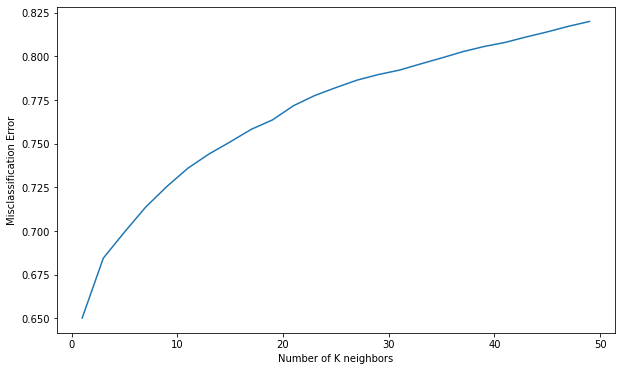

In [ ]:
MSE = [1-x for x in cv_scores]
                                               
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of K neighbors = %d ' %optimal_k)

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K neighbors')
plt.ylabel('Misclassification Error')
plt.show()

## **Линейная регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [ ]:
model1=LinearRegression()
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train.iloc[tr_idx],x_train.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]
    
    model1.fit(tr_x,tr_y)
    va_pred1=model1.predict(va_x)
    score_rmse1=np.sqrt(mean_squared_error(va_y,va_pred1)).mean()
    score_mae1=mean_absolute_error(va_y,va_pred1).mean()
    score_r21=r2_score(va_y,va_pred1).mean()

print('rmse1:',score_rmse1)
print('mae1:',score_mae1)
print('R21:',score_r21)

rmse1: 3509364.8731129747
mae1: 1371651.352193236
R21: 0.7273845098730778


# **Теперь сделаем градиентный спуск из xgboost, catboost, lgbm**

### ***Модель LGBM***

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

In [ ]:
params={'metric': 'rmse '}

In [ ]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=5000,
                early_stopping_rounds=100,
                verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.30075e+06
[200]	valid_0's rmse: 1.27167e+06
[300]	valid_0's rmse: 1.25461e+06
[400]	valid_0's rmse: 1.25213e+06
[500]	valid_0's rmse: 1.24586e+06
[600]	valid_0's rmse: 1.2413e+06
[700]	valid_0's rmse: 1.23667e+06
[800]	valid_0's rmse: 1.23362e+06
[900]	valid_0's rmse: 1.2308e+06
[1000]	valid_0's rmse: 1.23132e+06
Early stopping, best iteration is:
[957]	valid_0's rmse: 1.22968e+06


In [ ]:
predicted = gbm.predict(x_test)

In [ ]:
def pred_map(pred_df):
    rmse = np.sqrt(mean_squared_error(pred_df['data'], pred_df['pred']))
    R2 = r2_score(pred_df['data'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('data', 'pred', data=pred_df)
    ax.set_xlabel('Data Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'rmse = {}'.format(str(round(rmse, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [ ]:
df_prediction = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
df_prediction.columns = ['data', 'pred']

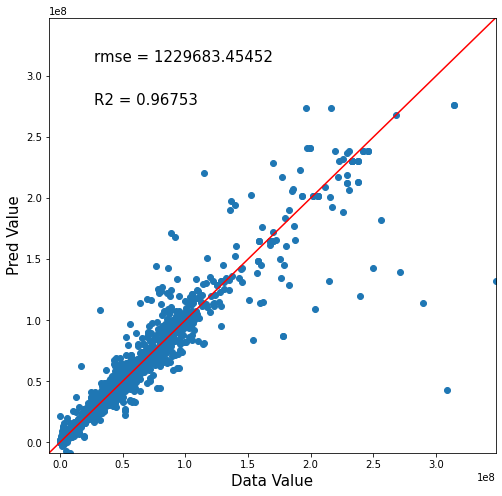

In [ ]:
pred_map(df_prediction)

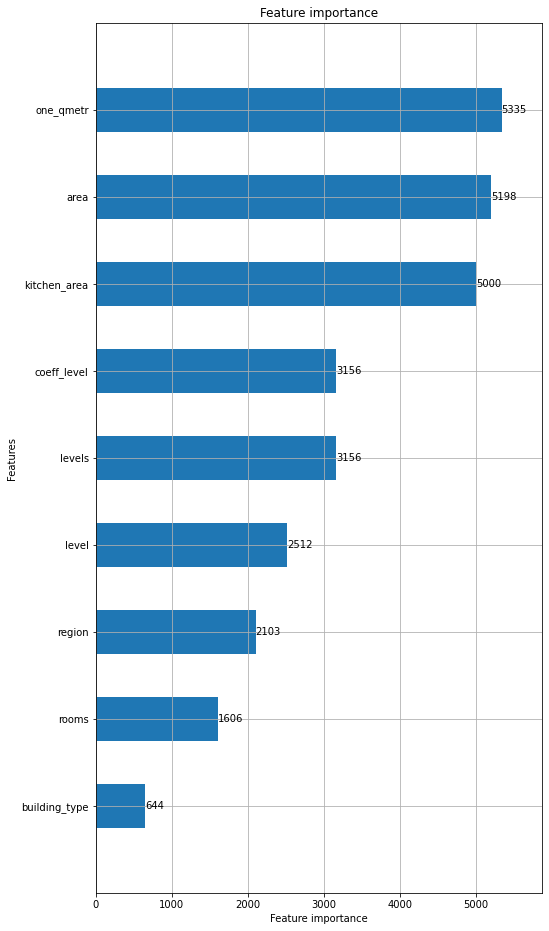

In [ ]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

## ***Модель XGBOOST***

In [ ]:
from xgboost import XGBRegressor
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for train_index, test_index in kf.split(x, y):

    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_xgb = XGBRegressor(objective='reg:squarederror')

    model_xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)],
                  eval_metric='rmse', early_stopping_rounds=50,
                  verbose=0)
    va_pred=model_xgb.predict(x_test)

    scores.append(model_xgb.best_score)
    score_rmse=np.sqrt(mean_squared_error(y_test,va_pred)).mean()
    score_mae=mean_absolute_error(y_test,va_pred).mean()
    score_r2=r2_score(y_test,va_pred).mean()


print('XGBoost average RMSE:', np.mean(scores))
print('rmse:',score_rmse)
print('mae:',score_mae)
print('R2',score_r2)

XGBoost average RMSE: 425160.09375
rmse: 412042.64138667734
mae: 165713.5189108359
R2 0.9962956691417878


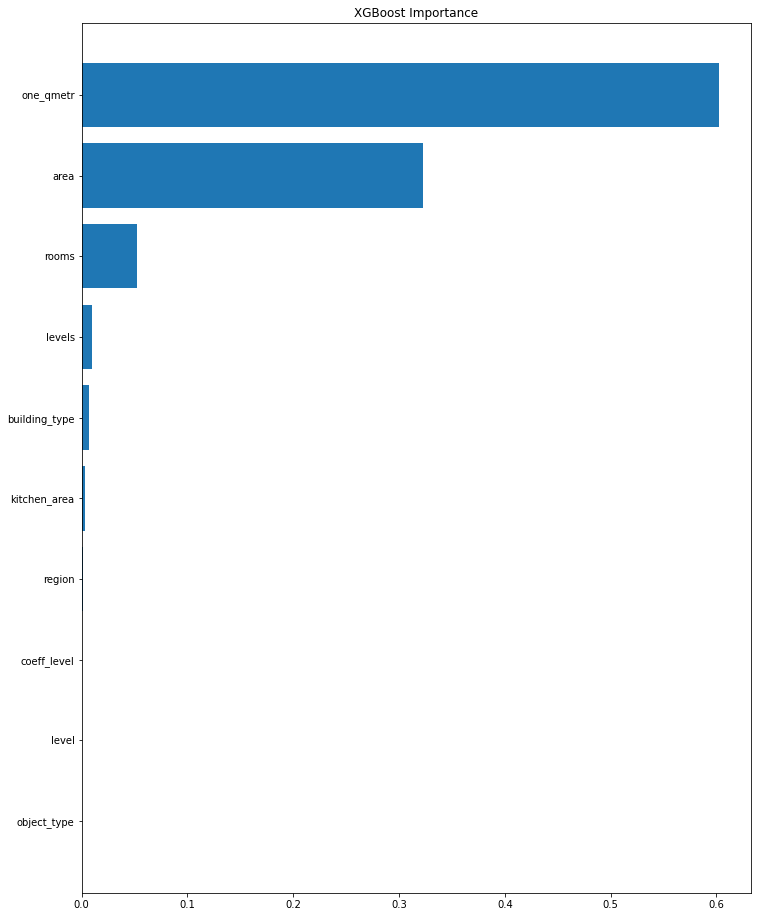

In [ ]:
importance = pd.DataFrame({
    'features': x.columns,
    'importance': model_xgb.feature_importances_
})
importance.sort_values(by='importance', inplace=True)

plt.figure(figsize=(12, 16))
plt.barh(importance['features'], importance['importance'])
plt.title('XGBoost Importance')
plt.show()

##  **Модель CatBoost**


In [ ]:
from catboost import CatBoostRegressor
for train_index, test_index in kf.split(x, y):

    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_cb = CatBoostRegressor(eval_metric='RMSE')
    model_cb.fit(x_train, y_train, eval_set=[(x_test, y_test)],
                 early_stopping_rounds=10, use_best_model=True,
                 verbose=0)
    va_pred1=model_cb.predict(x_test)

    scores.append(model_cb.best_score_['validation']['RMSE'])
    score_rmse2=np.sqrt(mean_squared_error(y_test,va_pred1)).mean()
    score_mae2=mean_absolute_error(y_test,va_pred1).mean()
    score_r22=r2_score(y_test,va_pred1).mean()
print('CatBoost average RMSE:', np.mean(scores))
print('rmse1:',score_rmse2)
print('mae1:',score_mae2)
print('R2:',score_r22)

CatBoost average RMSE: 892879.4114560522
rmse1: 1391811.49589374
mae1: 163554.71808834263
R2: 0.9577344735358475


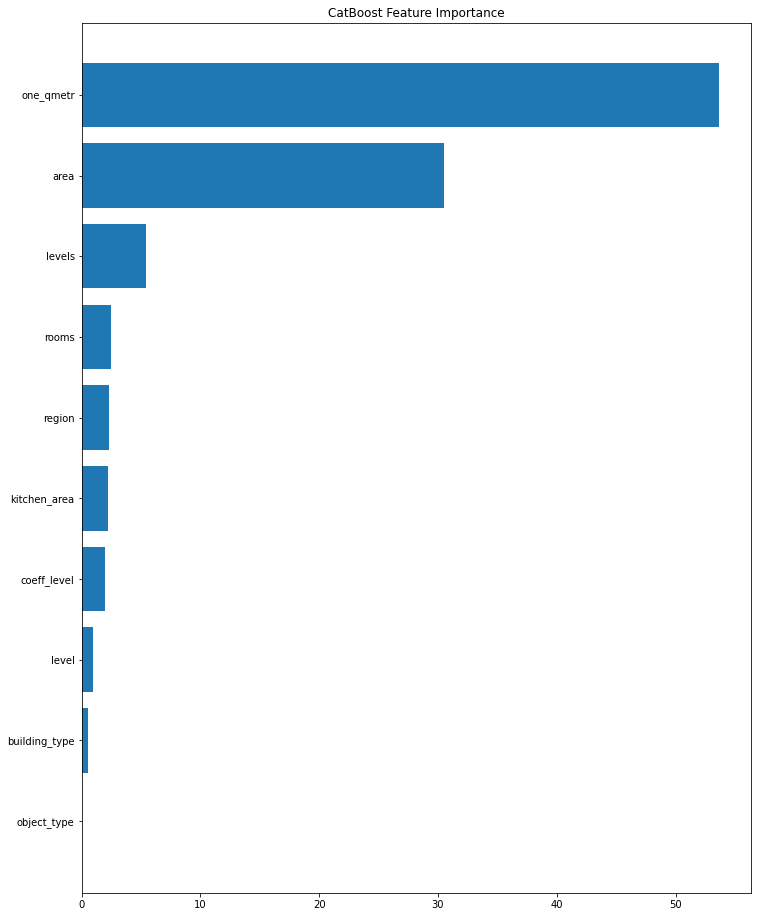

In [ ]:
importance = pd.DataFrame({
    'features': x.columns,
    'importance': model_cb.feature_importances_
})
importance.sort_values(by='importance', inplace=True)

plt.figure(figsize=(12, 16))
plt.barh(importance['features'], importance['importance'])
plt.title('CatBoost Feature Importance')
plt.show()

##  **Модель RandomTree**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)
model.fit(x_train,y_train)
pred=model.predict(x_test)
score_r21=r2_score(y_test,pred).mean()

print('R21:',score_r21)

R21: 0.9980620980604666


In [ ]:
[(est.get_depth(), est.tree_.max_depth) for est in model.estimators_]
model.n_estimators

100

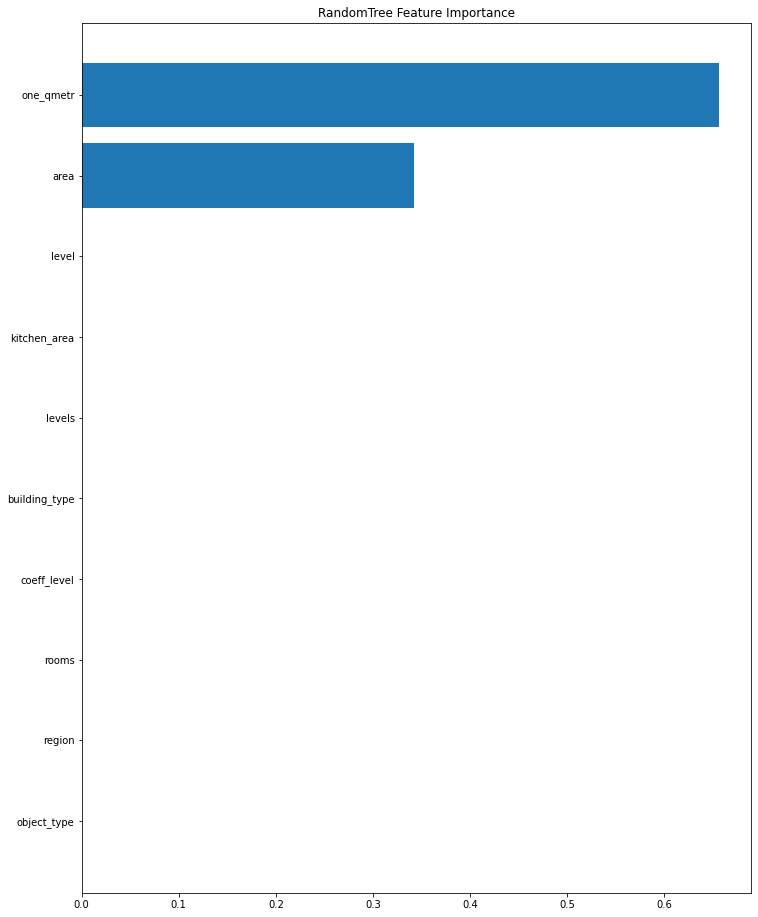

In [ ]:
importance = pd.DataFrame({
    'features': x.columns,
    'importance': model.feature_importances_
})
importance.sort_values(by='importance', inplace=True)

plt.figure(figsize=(12, 16))
plt.barh(importance['features'], importance['importance'])
plt.title('RandomTree Feature Importance')
plt.show()

**Также была реализована стратифицированная кросс-валидация,но была убрана,так как результаты не поменялись**


# **Создание нейросети**

Epoch 1/100
12/12 [==============================] - 1s 57ms/step - loss: 4925211.5000 - val_loss: 4935659.5000
Epoch 2/100
12/12 [==============================] - 0s 41ms/step - loss: 4920023.0000 - val_loss: 4930341.5000
Epoch 3/100
12/12 [==============================] - 0s 42ms/step - loss: 4914542.5000 - val_loss: 4924555.0000
Epoch 4/100
12/12 [==============================] - 1s 43ms/step - loss: 4908308.0000 - val_loss: 4917614.5000
Epoch 5/100
12/12 [==============================] - 1s 42ms/step - loss: 4900721.0000 - val_loss: 4909137.0000
Epoch 6/100
12/12 [==============================] - 1s 42ms/step - loss: 4891440.0000 - val_loss: 4898733.0000
Epoch 7/100
12/12 [==============================] - 1s 43ms/step - loss: 4880047.5000 - val_loss: 4886223.5000
Epoch 8/100
12/12 [==============================] - 0s 41ms/step - loss: 4866123.5000 - val_loss: 4868505.5000
Epoch 9/100
12/12 [==============================] - 1s 43ms/step - loss: 4843019.0000 - val_loss: 48388

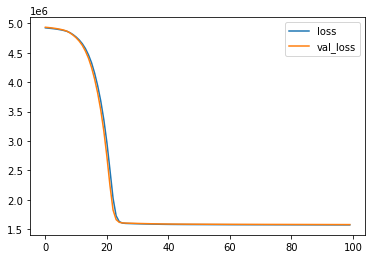

In [ ]:
from tensorflow import keras

model=keras.Sequential([keras.layers.Dense(10, activation='relu',input_shape=[10]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1),
])


model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=100000,
    epochs=100,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();